In [1]:
import xml.etree.ElementTree as ET

In [2]:
import pandas as pd

xml_file = ET.parse('SAMPLE_FILES_FOR_DEV/PhysiCell_settings.xml')

In [3]:
micro_env = xml_file.findall('microenvironment_setup')

In [12]:
variable = micro_env[0][0]

In [13]:
physical_parameter_set = variable[0]

In [ ]:
ET.Element(tag='variable', attrib={}, text='')
ET.ElementTree()

In [1]:
import pyMCDS
import pyMCDS_timeseries as pyMCDS_ts

In [10]:
mcds = pyMCDS.pyMCDS('C://Users//User//PhysiCell//output//output00000002.xml', 'C://Users//User//PhysiCell//output//')

Reading C:\Users\User\PhysiCell\output\output00000002.xml
Reading C:\Users\User\PhysiCell\output\initial_mesh0.mat
Reading C:\Users\User\PhysiCell\output\output00000002_microenvironment0.mat
Parsing poison data
Reading C:\Users\User\PhysiCell\output\output00000002_cells_physicell.mat


In [2]:
ts_mcds = pyMCDS_ts.pyMCDS_timeseries('C:/Users/User/PhysiCell/output/')

Reading C:\Users\User\PhysiCell\output\output00000001.xml
Reading C:\Users\User\PhysiCell\output\initial_mesh0.mat
Reading C:\Users\User\PhysiCell\output\output00000001_microenvironment0.mat
Parsing poison data
Reading C:\Users\User\PhysiCell\output\output00000001_cells_physicell.mat
Reading C:\Users\User\PhysiCell\output\output00000002.xml
Reading C:\Users\User\PhysiCell\output\initial_mesh0.mat
Reading C:\Users\User\PhysiCell\output\output00000002_microenvironment0.mat
Parsing poison data
Reading C:\Users\User\PhysiCell\output\output00000002_cells_physicell.mat
Reading C:\Users\User\PhysiCell\output\output00000003.xml
Reading C:\Users\User\PhysiCell\output\initial_mesh0.mat
Reading C:\Users\User\PhysiCell\output\output00000003_microenvironment0.mat
Parsing poison data
Reading C:\Users\User\PhysiCell\output\output00000003_cells_physicell.mat
Reading C:\Users\User\PhysiCell\output\output00000004.xml
Reading C:\Users\User\PhysiCell\output\initial_mesh0.mat
Reading C:\Users\User\PhysiCel

In [3]:
import numpy as np
import pandas as pd

In [11]:
def get_dead_cells_at_t(time_frame_data: pyMCDS_ts, prev_dead_cells_idx: list)->np.array:
    dead_cells_and_loci = list()
    cells_data = time_frame_data.data['discrete_cells']
    for cell_idx, cell_heath in enumerate(cells_data['health_bar']):
        if cell_heath<=0 and cell_idx not in prev_dead_cells_idx:
            cell_x, cell_y = cells_data['position_x'][cell_idx], cells_data['position_y'][cell_idx]
            # x,y,t
            dead_cells_and_loci.append(np.array([cell_x, cell_y, cell_idx]))
    return np.array(dead_cells_and_loci)

t = get_dead_cells_at_t(time_frame_data=mcds, prev_dead_cells_idx=[])

In [12]:
def get_cells_death_time(ts_mcds: pyMCDS_ts):
    xyt_df = {'cell_x': [], 'cell_y': [], 'death_time': []}
    time_frames = len(ts_mcds.timeseries)
    dead_cells_indices = list()
    for frame_idx in range(time_frames):
        time_frame_data = ts_mcds.timeseries[frame_idx]
        dead_cells_in_curr_frame = get_dead_cells_at_t(time_frame_data=time_frame_data,
                                                       prev_dead_cells_idx=dead_cells_indices)
        if dead_cells_in_curr_frame.size == 0:
            continue
        dead_cells_indices+=dead_cells_in_curr_frame[:, 2].tolist()
        dead_cells_in_curr_frame[:, 2] = frame_idx
        xyt_df['cell_x'] += dead_cells_in_curr_frame[:, 0].tolist()
        xyt_df['cell_y'] += dead_cells_in_curr_frame[:, 1].tolist()
        xyt_df['death_time'] += dead_cells_in_curr_frame[:, 2].tolist()
    return pd.DataFrame(xyt_df)
xyt_df_test = get_cells_death_time(ts_mcds)

In [16]:
import matplotlib.pyplot as plt

In [4]:
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']
# op = mcds.data['discrete_cells']['substrate2']

(-500.0, 500.0, -500.0, 500.0)

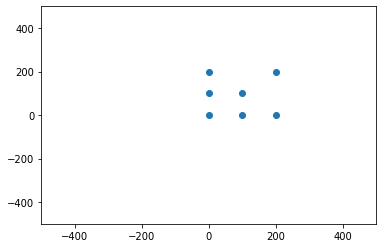

In [7]:
plt.scatter(cx,cy)#,c=op)

plt.axis([-500,500,-500,500])

Reading C:\Users\User\PhysiCell\output\output00000000.xml
Reading C:\Users\User\PhysiCell\output\initial_mesh0.mat
Reading C:\Users\User\PhysiCell\output\output00000000_microenvironment0.mat
Parsing poison data
Parsing internal_poison data
Reading C:\Users\User\PhysiCell\output\output00000000_cells_physicell.mat
Reading C:\Users\User\PhysiCell\output\output00000001.xml
Reading C:\Users\User\PhysiCell\output\initial_mesh0.mat
Reading C:\Users\User\PhysiCell\output\output00000001_microenvironment0.mat
Parsing poison data
Parsing internal_poison data
Reading C:\Users\User\PhysiCell\output\output00000001_cells_physicell.mat
Reading C:\Users\User\PhysiCell\output\output00000002.xml
Reading C:\Users\User\PhysiCell\output\initial_mesh0.mat
Reading C:\Users\User\PhysiCell\output\output00000002_microenvironment0.mat
Parsing poison data
Parsing internal_poison data
Reading C:\Users\User\PhysiCell\output\output00000002_cells_physicell.mat
Reading C:\Users\User\PhysiCell\output\output00000003.xml


C:\Users\User\AppData\Local\Temp/ipykernel_22680/939784726.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

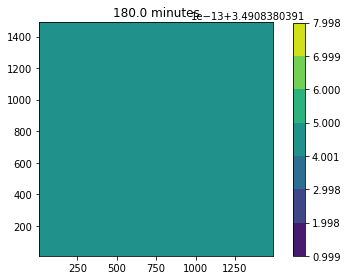

In [12]:
import pyMCDS
import pyMCDS_timeseries as pyMCDS_ts
ts_mcds = pyMCDS_ts.pyMCDS_timeseries('C:/Users/User/PhysiCell/output/')

C:\Users\User\AppData\Local\Temp/ipykernel_22680/3334246897.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

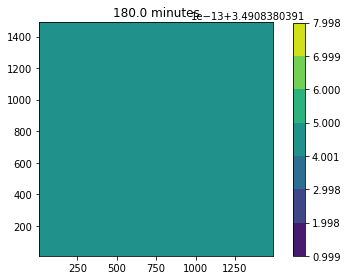

In [16]:
import matplotlib.pyplot as plt
import os



substrates = ("internal_poison", "poison")
SKIP = 1

for substrate_name in substrates:
    dir_path = os.sep.join(['movie_attempts', f'{substrate_name}'])

    if not os.path.isdir(dir_path):
        os.makedirs(dir_path)

    for frame_idx, frame_mcds in enumerate(ts_mcds.timeseries[::SKIP]):
        plt.clf()
        fig, ax = plt.subplots()
        substrate = frame_mcds.get_concentrations( substrate_name )
        frame_real_time = frame_mcds.data['metadata']['current_time']

        X,Y = frame_mcds.get_2D_mesh()
        cx = frame_mcds.data['discrete_cells']['position_x']
        cy = frame_mcds.data['discrete_cells']['position_y']
        cf = ax.contourf(X,Y,substrate[:,:,0])
        ax.axis('image')
        ax.scatter(cx,cy, c='black', marker='*')
        ax.set_title(f'{frame_real_time} minutes')
        cbar = fig.colorbar(cf)
        # plt.colorbar()
        plt.tight_layout()
        fig_path = os.sep.join([dir_path, f'{int(frame_idx):03d}.jpeg'])
        fig.savefig(fig_path, dpi=200)

In [2]:
import pyMCDS_timeseries as pyMCDS_ts
ts_mcds = pyMCDS_ts.pyMCDS_timeseries('C:/Users/User/PhysiCell/output/')

Reading C:\Users\User\PhysiCell\output\output00000000.xml
Reading C:\Users\User\PhysiCell\output\initial_mesh0.mat
Reading C:\Users\User\PhysiCell\output\output00000000_microenvironment0.mat
Parsing poison data
Parsing internal_poison data
Reading C:\Users\User\PhysiCell\output\output00000000_cells_physicell.mat
Reading C:\Users\User\PhysiCell\output\output00000001.xml
Reading C:\Users\User\PhysiCell\output\initial_mesh0.mat
Reading C:\Users\User\PhysiCell\output\output00000001_microenvironment0.mat
Parsing poison data
Parsing internal_poison data
Reading C:\Users\User\PhysiCell\output\output00000001_cells_physicell.mat
Reading C:\Users\User\PhysiCell\output\output00000002.xml
Reading C:\Users\User\PhysiCell\output\initial_mesh0.mat
Reading C:\Users\User\PhysiCell\output\output00000002_microenvironment0.mat
Parsing poison data
Parsing internal_poison data
Reading C:\Users\User\PhysiCell\output\output00000002_cells_physicell.mat
Reading C:\Users\User\PhysiCell\output\output00000003.xml


<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

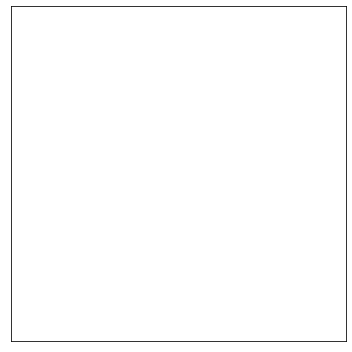

In [7]:
# MOVIE
import matplotlib.pyplot as plt
import matplotlib.animation as animation



substrates = ("internal_poison", "poison")


for substrate_name in substrates:
    plt.clf()

    fig = plt.figure()
    ax = fig.add_subplot(111)

    frame_mcds = ts_mcds.timeseries[0]
    substrate = frame_mcds.get_concentrations( substrate_name )
    frame_real_time = frame_mcds.data['metadata']['current_time']

    # ax.set_title(f"Time: {frame_real_time}")

    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    im = ax.imshow(substrate[:, :, 0], cmap='gray', interpolation='nearest')
    im.set_clim([0,1])
    fig.set_size_inches([5,5])

    plt.tight_layout()

    def update_img(frame_mcds):
        # frame_mcds = ts_mcds.timeseries[n]
        substrate = frame_mcds.get_concentrations( substrate_name )
        frame_real_time = frame_mcds.data['metadata']['current_time']
        im.set_data(substrate[:, :, 0])
        # im.set_title(f"Time: {frame_real_time}")
        return im

    ani = animation.FuncAnimation(fig,update_img,frames=ts_mcds.timeseries[1:])
    writer = animation.writers['ffmpeg'](fps=1)

    ani.save(f'{substrate_name}_demo.mp4',writer=writer,dpi=200)

In [ ]:
import matplotlib.animation as animation
import numpy as np
from pylab import *


def ani_frame():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    im = ax.imshow(rand(300,300),cmap='gray',interpolation='nearest')
    im.set_clim([0,1])
    fig.set_size_inches([5,5])


    plt.tight_layout()


    def update_img(n):
        tmp = rand(300,300)
        im.set_data(tmp)
        return im

    #legend(loc=0)
    ani = animation.FuncAnimation(fig,update_img,300,interval=30)
    writer = animation.writers['ffmpeg'](fps=30)

    ani.save('demo.mp4',writer=writer,dpi=200)
    return ani

ani_frame()